# 이상치의 영향
- 이상치란? : outlier
    - 이상치를 제거하는 경우
    - 이상치를 제거하지 않고 사용해야 하는 경우
    - 이상치를 따로 분리해서 사용해야 하는 경우
    - 이상치만 찾아야 하는 경우

## 이상치의 기준이 무엇인가?
- iqr 사분위수 : 통계적으로 바라보는 이상치
    - 단순한 통계치
    - 맹신하고 이상치를 제거할 때 바로 사용하면 안됨 
<br><br>
- 이상치는 도메인적으로 같이 고려해야함
    - 예) 고객 데이터 : 주문 금액 평균 20만원 / A집단은 평균 1,000만원 ->> 그냥 날리면 일반적인 고객만 보는 것
    - 군집을 나눠서 세분화해서 분석할 수도 있음
    - 이상치의 새로운 파생변수를 만들어서, 이상치에 대해 가중치를 둘 수도 있음!
---
> 이상치를 계속 제거 -> 이상치의 영향도가 줄어듦 -> R2, MSE는 당연히 좋아짐
> <br> 과연 이것이 맞는 방향인지 고민해야함!🚨
- 이상치를 제거하지 않고 성능이 좀 더 나아질 수 있지 않을까?
- 파생변수를 하나 만들어서 실제 성능이 조금은 좋아지는지 확인해보자.
## 필수 과제
- 공유드린 데이터셋으로 이상치 2번 이상 제거 -> 실제 R2, MSE 값이 어떻게 변하는지 정리
- 시각화를 통해 이상치의 분포 및 제거시 어떤 식으로 바뀌는지 그래프 그리기
- base, 이상치 제거 1차, 2차 -> 비교 표 만들기
- 이상치 제거하면서 변화하는 RMSE, R2 내용 정리
- Rev_range 조절해서 값을 같이 봐주기!
- 아래 캘리포니아 데이터로 직접 진행

MedInc: 해당 지역의 중간 소득. 이 값은 수천 달러 단위로 표현됩니다. 중간 소득이 높을수록 해당 지역의 주민들은 더 많은 돈을 벌고 있다는 것을 의미합니다.

HouseAge: 해당 지역의 중앙값 주택 연령. 이는 지역에 있는 주택들 중간의 연령을 나타냅니다.

AveRooms: 지역의 평균 방 갯수. 이 값은 해당 지역의 모든 주택의 방 수를 평균낸 것입니다.

AveBedrms: 지역의 평균 침실 갯수. 이 값은 해당 지역의 모든 주택의 침실 수를 평균낸 것입니다.

Population: 해당 지역의 인구. 이는 해당 지역에 살고 있는 사람들의 수를 나타냅니다.

AveOccup: 평균 주택 점유율. 이는 한 주택에 평균적으로 거주하는 사람의 수를 나타냅니다.

Latitude: 해당 지역의 위도입니다.

Longitude: 해당 지역의 경도입니다.

Target: 이는 해당 지역의 중앙값 주택 가격을 나타냅니다. 이 값은 수십만 달러 단위로 표현됩니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
plt.rcParams['figure.dpi'] = 300

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# 사이킷런 제공의 캘리포니아 집값 데이터셋
from sklearn.datasets import fetch_california_housing

In [3]:
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()

# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target  # 목표 변수 추가

# 데이터프레임의 첫 5행 출력
print(df_housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [4]:
df_housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

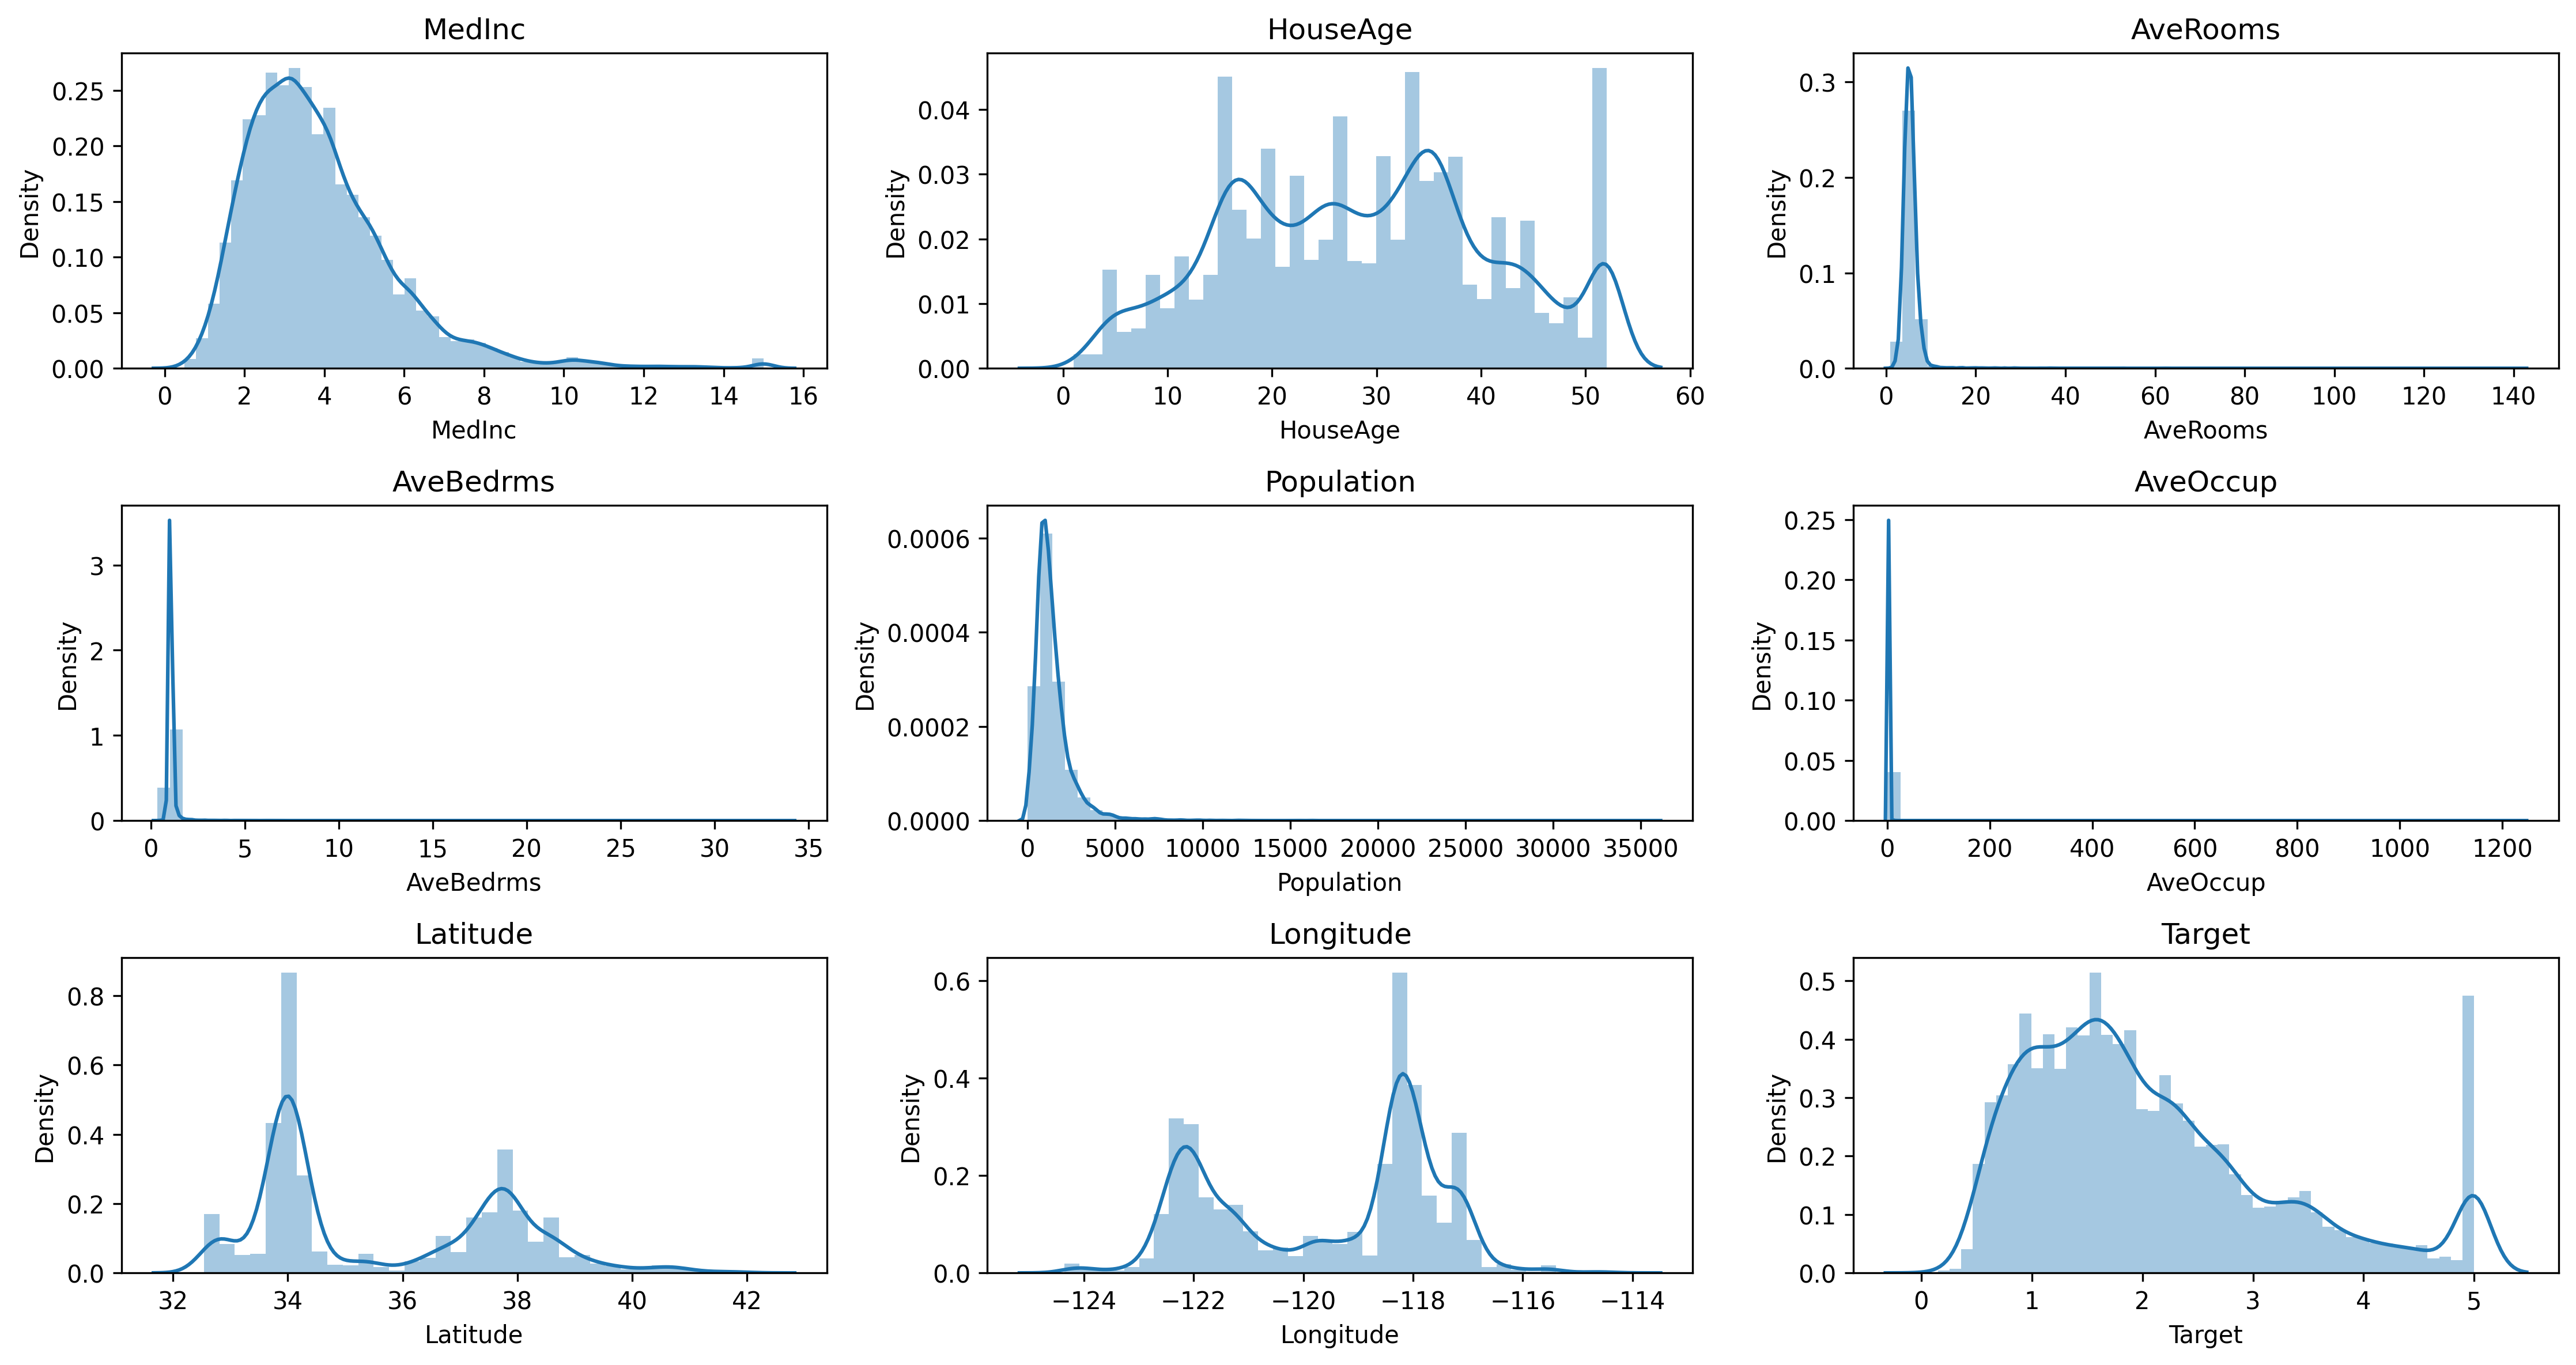

In [5]:
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, 8))

for i, col in enumerate(df_housing.columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.distplot(df_housing[col], ax = axes[row_index, col_index], kde=True)
    axes[row_index, col_index].set_title(col)

plt.tight_layout()
plt.show()

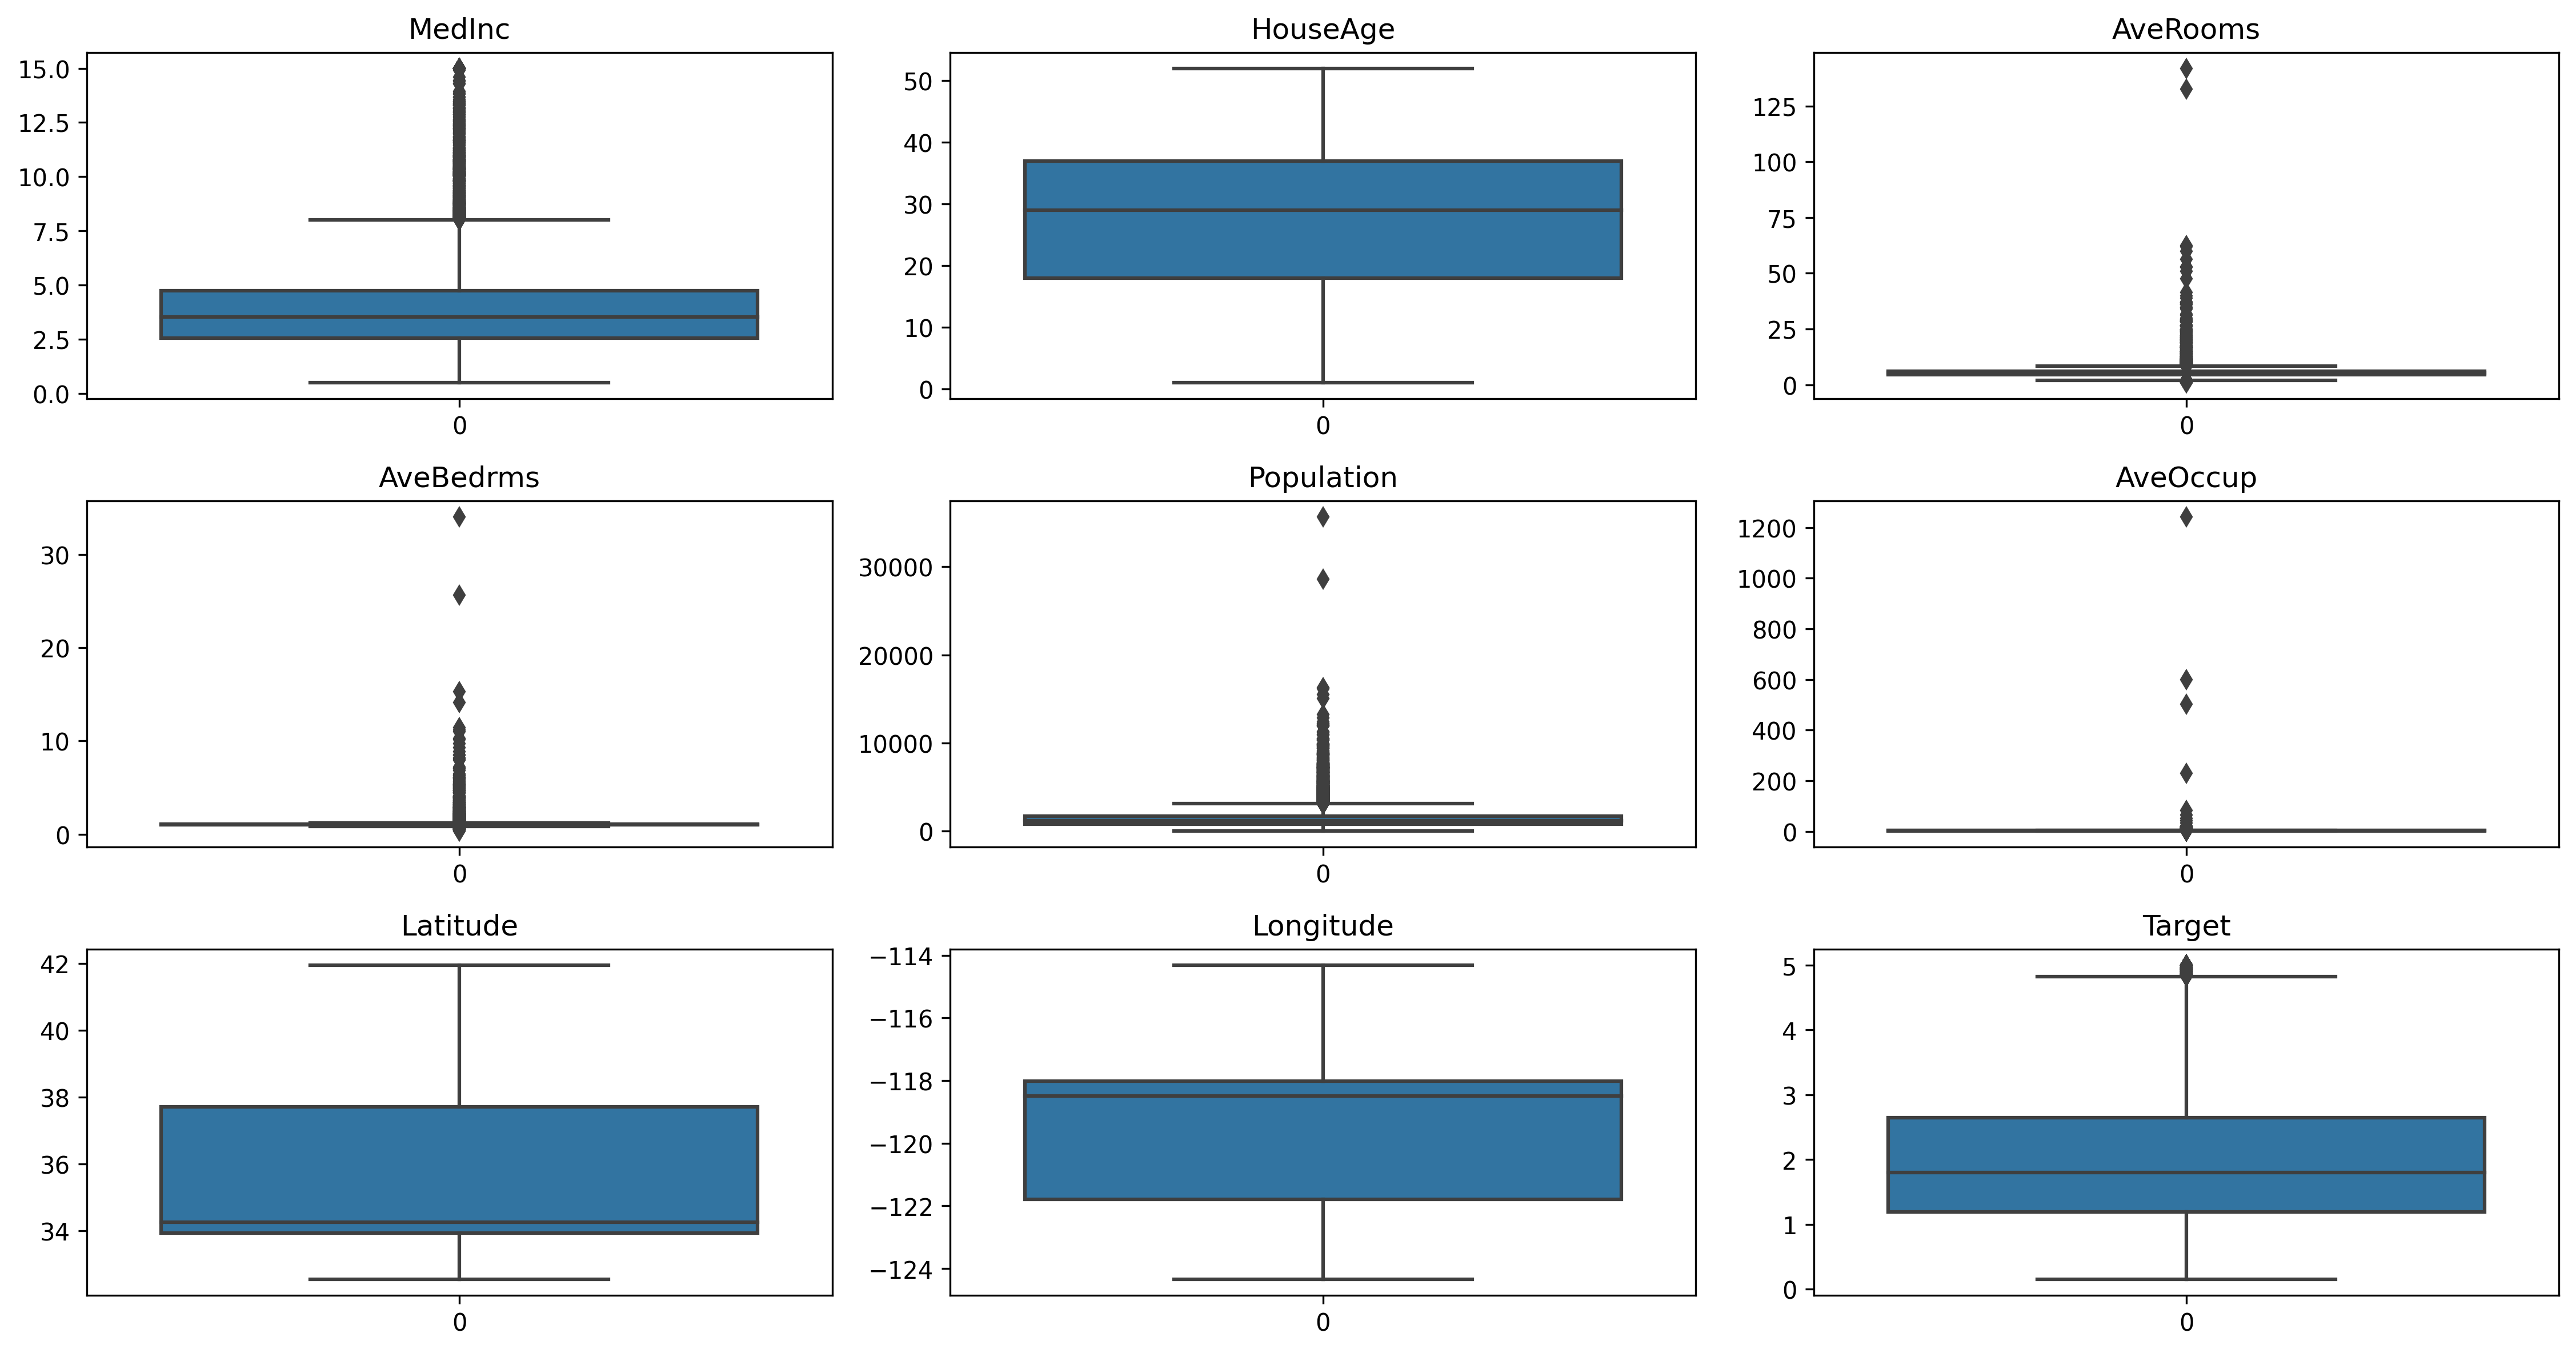

In [6]:
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, 8))

for i, col in enumerate(df_housing.columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data = df_housing[col], ax = axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

plt.tight_layout()
plt.show()

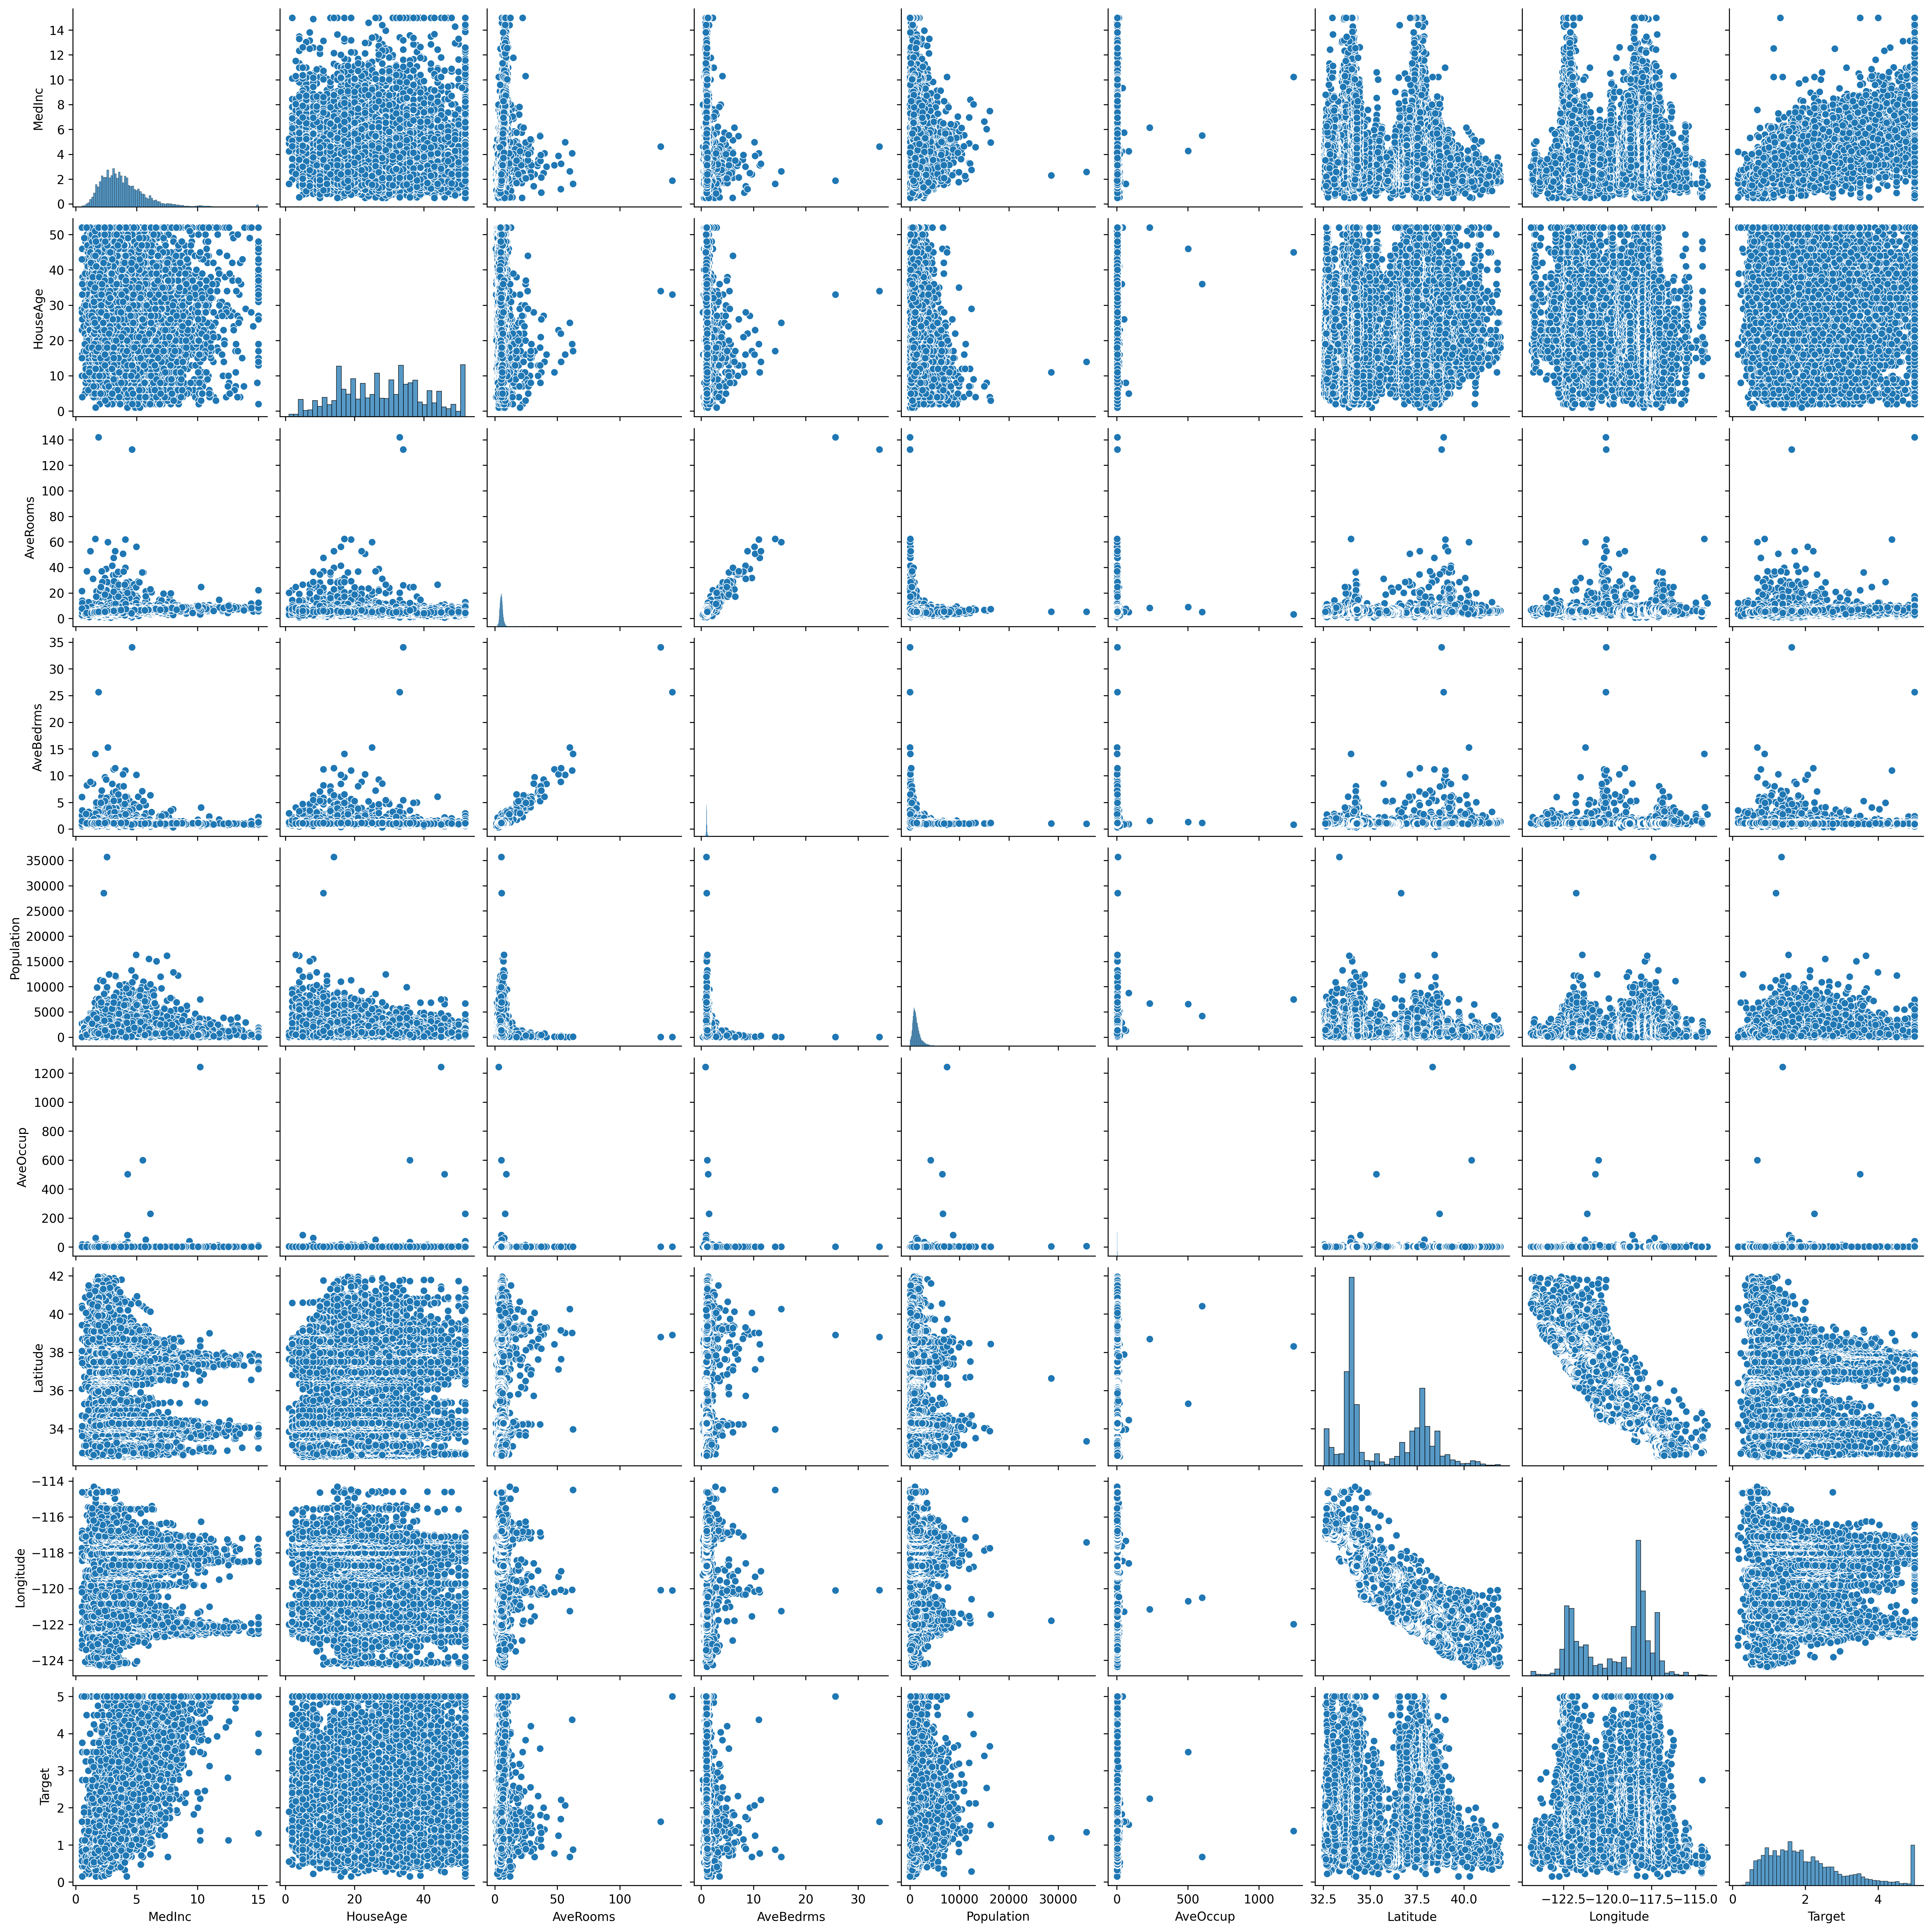

In [7]:
sns.pairplot(df_housing)
plt.show()

- MedInc 를 독립변수로 채택 -> 이상치 확인

### 이상치 제거 전

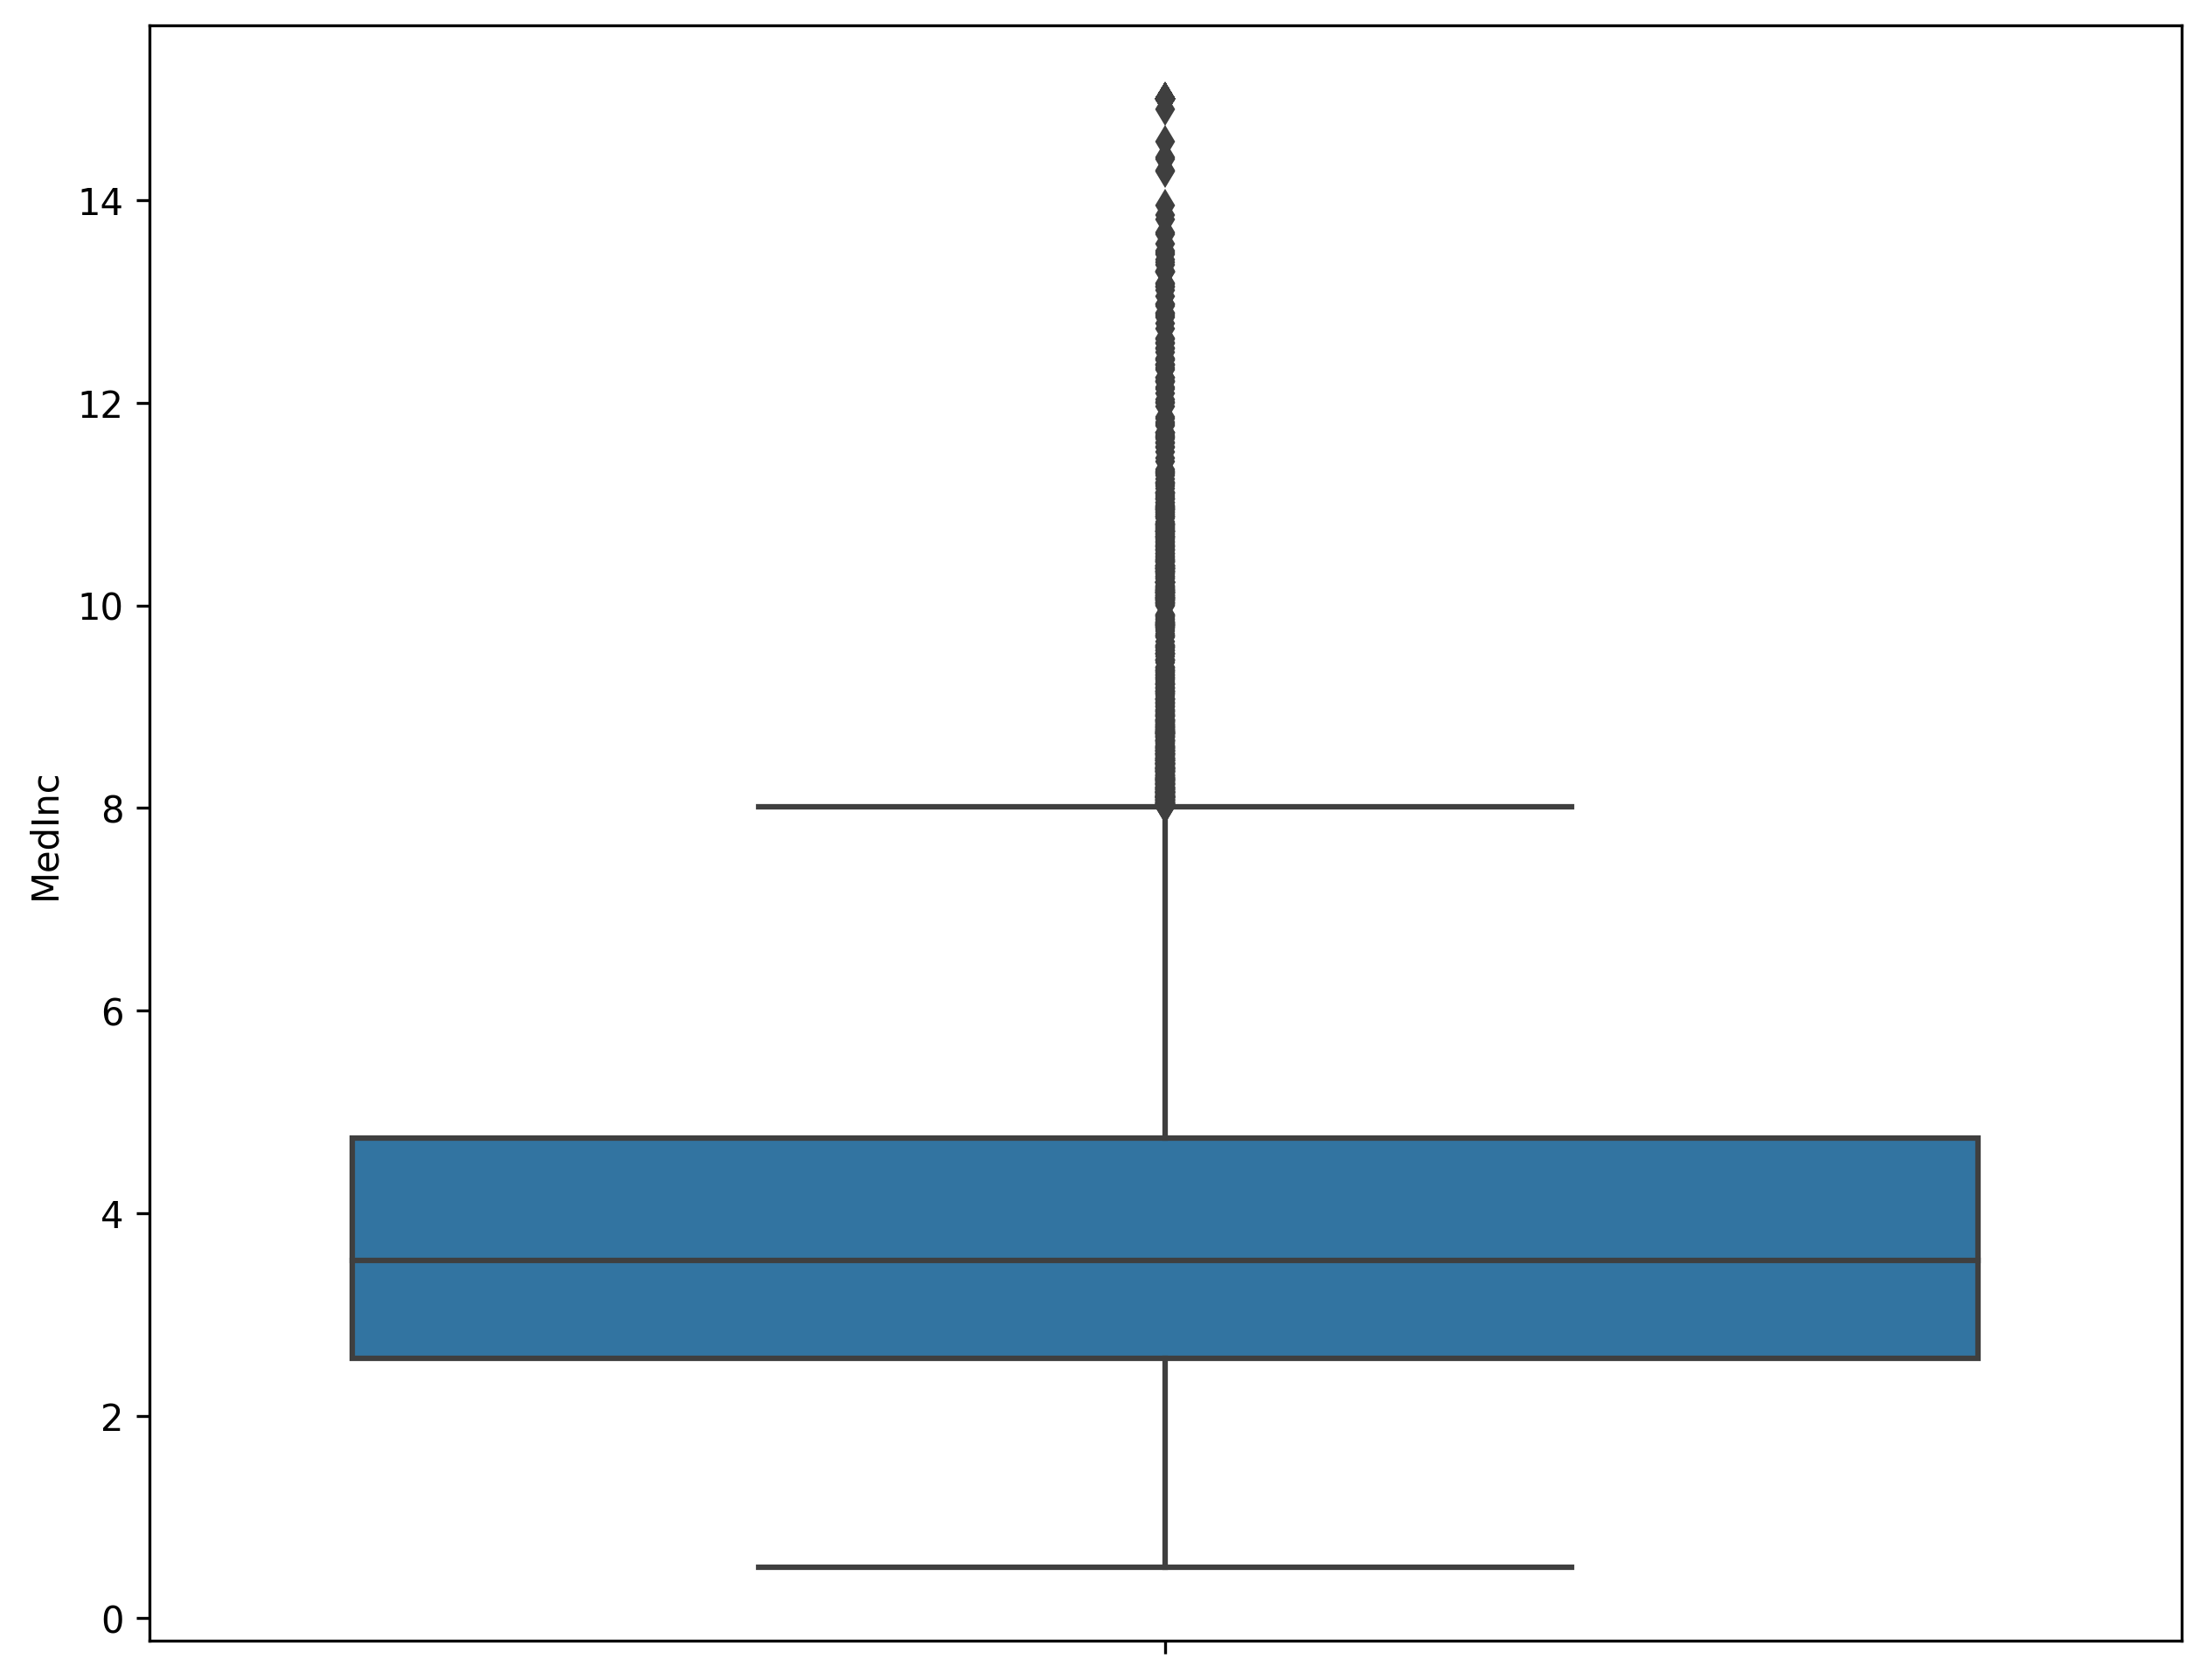

In [8]:
plt.figure(figsize = (10, 8))
sns.boxplot(y='MedInc', data = df_housing)
plt.show()

### 이상치 제거 전 회귀(Base)

In [9]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error #MSE

In [10]:
X = df_housing['MedInc']
y = df_housing['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)
print('train cnt: ', len(X_train))
print('test cnt: ', len(X_test))

train cnt:  14448
test cnt:  6192


In [11]:
mreg = LinearRegression(fit_intercept = True) # 절편 포함
mreg.fit(np.array(X_train).reshape(-1, 1), y_train) # 독립변수를 2차원 배열로 변환

LinearRegression()

In [12]:
y_pred = mreg.predict(np.array(X_test).reshape(-1, 1))
y_pred

array([1.7902321 , 2.83640318, 1.12153074, ..., 1.67713366, 1.33461173,
       1.42198122])

In [13]:
print('train R2:{:.5f}'.format(mreg.score(np.array(X_train).reshape(-1, 1), y_train)))
print('test R2:{:.5f}'.format(mreg.score(np.array(X_test).reshape(-1, 1), y_test)))

train R2:0.47909
test R2:0.46021


In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmse: {:.3f}'.format(rmse))

rmse: 0.848


In [15]:
ols_m = sm.OLS(y_train, sm.add_constant(X_train)).fit()
ols_m.summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.329e+04
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:08:49   Log-Likelihood:                -17854.
No. Observations:               14448   AIC:                         3.571e+04
Df Residuals:                   14446   BIC:                         3.573e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4458      0.016     28.487      0.000       0.415       0.477
MedInc         0.4190      0.004    115.266      0.000       0.412       0.426
==============================================================================
Omnibus:                     3034.570   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6886.016
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       5.390   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# 회귀 과정 함수화
def linear_regression(df, X_col, y_col, test_size=0.3, random_state=11):
    #변수 설정
    X = df[X_col]
    y = df[y_col]
    
    #train, test 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print('train cnt:', len(X_train))
    print('test cnt:', len(X_test))
    
    #선형회귀모델 생성 및 훈련
    mreg = LinearRegression(fit_intercept=True)
    mreg.fit(np.array(X_train).reshape(-1,1), y_train)
    
    #훈련 및 테스트 세트에 대한 R-squared 계산
    train_r2 = mreg.score(np.array(X_train).reshape(-1,1), y_train)
    test_r2 = mreg.score(np.array(X_test).reshape(-1,1), y_test)
    print('train R2:{:.5f}'.format(train_r2))
    print('test R2:{:.5f}'.format(test_r2))
    
    #테스트 세트에 대한 예측 및 RMSE 계산
    y_pred = mreg.predict(np.array(X_test).reshape(-1,1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('rmse: {:.3f}'.format(rmse))
    
    return mreg, train_r2, test_r2, rmse

### 이상치 확인 및 1차 제거
- Rev_range = 2.0

In [17]:
# HouseAge 이상치 확인 -> 사분위수로 
Q1 = df_housing['MedInc'].quantile(0.25)
Q3 = df_housing['MedInc'].quantile(0.75)
IQR = Q3 - Q1
rev_range = 2.0

filter = (df_housing['MedInc'] >= Q1 - IQR*rev_range) & (df_housing['MedInc'] <= Q3 + IQR*rev_range)

In [18]:
# 이상치 1차 제거
df_1 = df_housing.loc[filter]

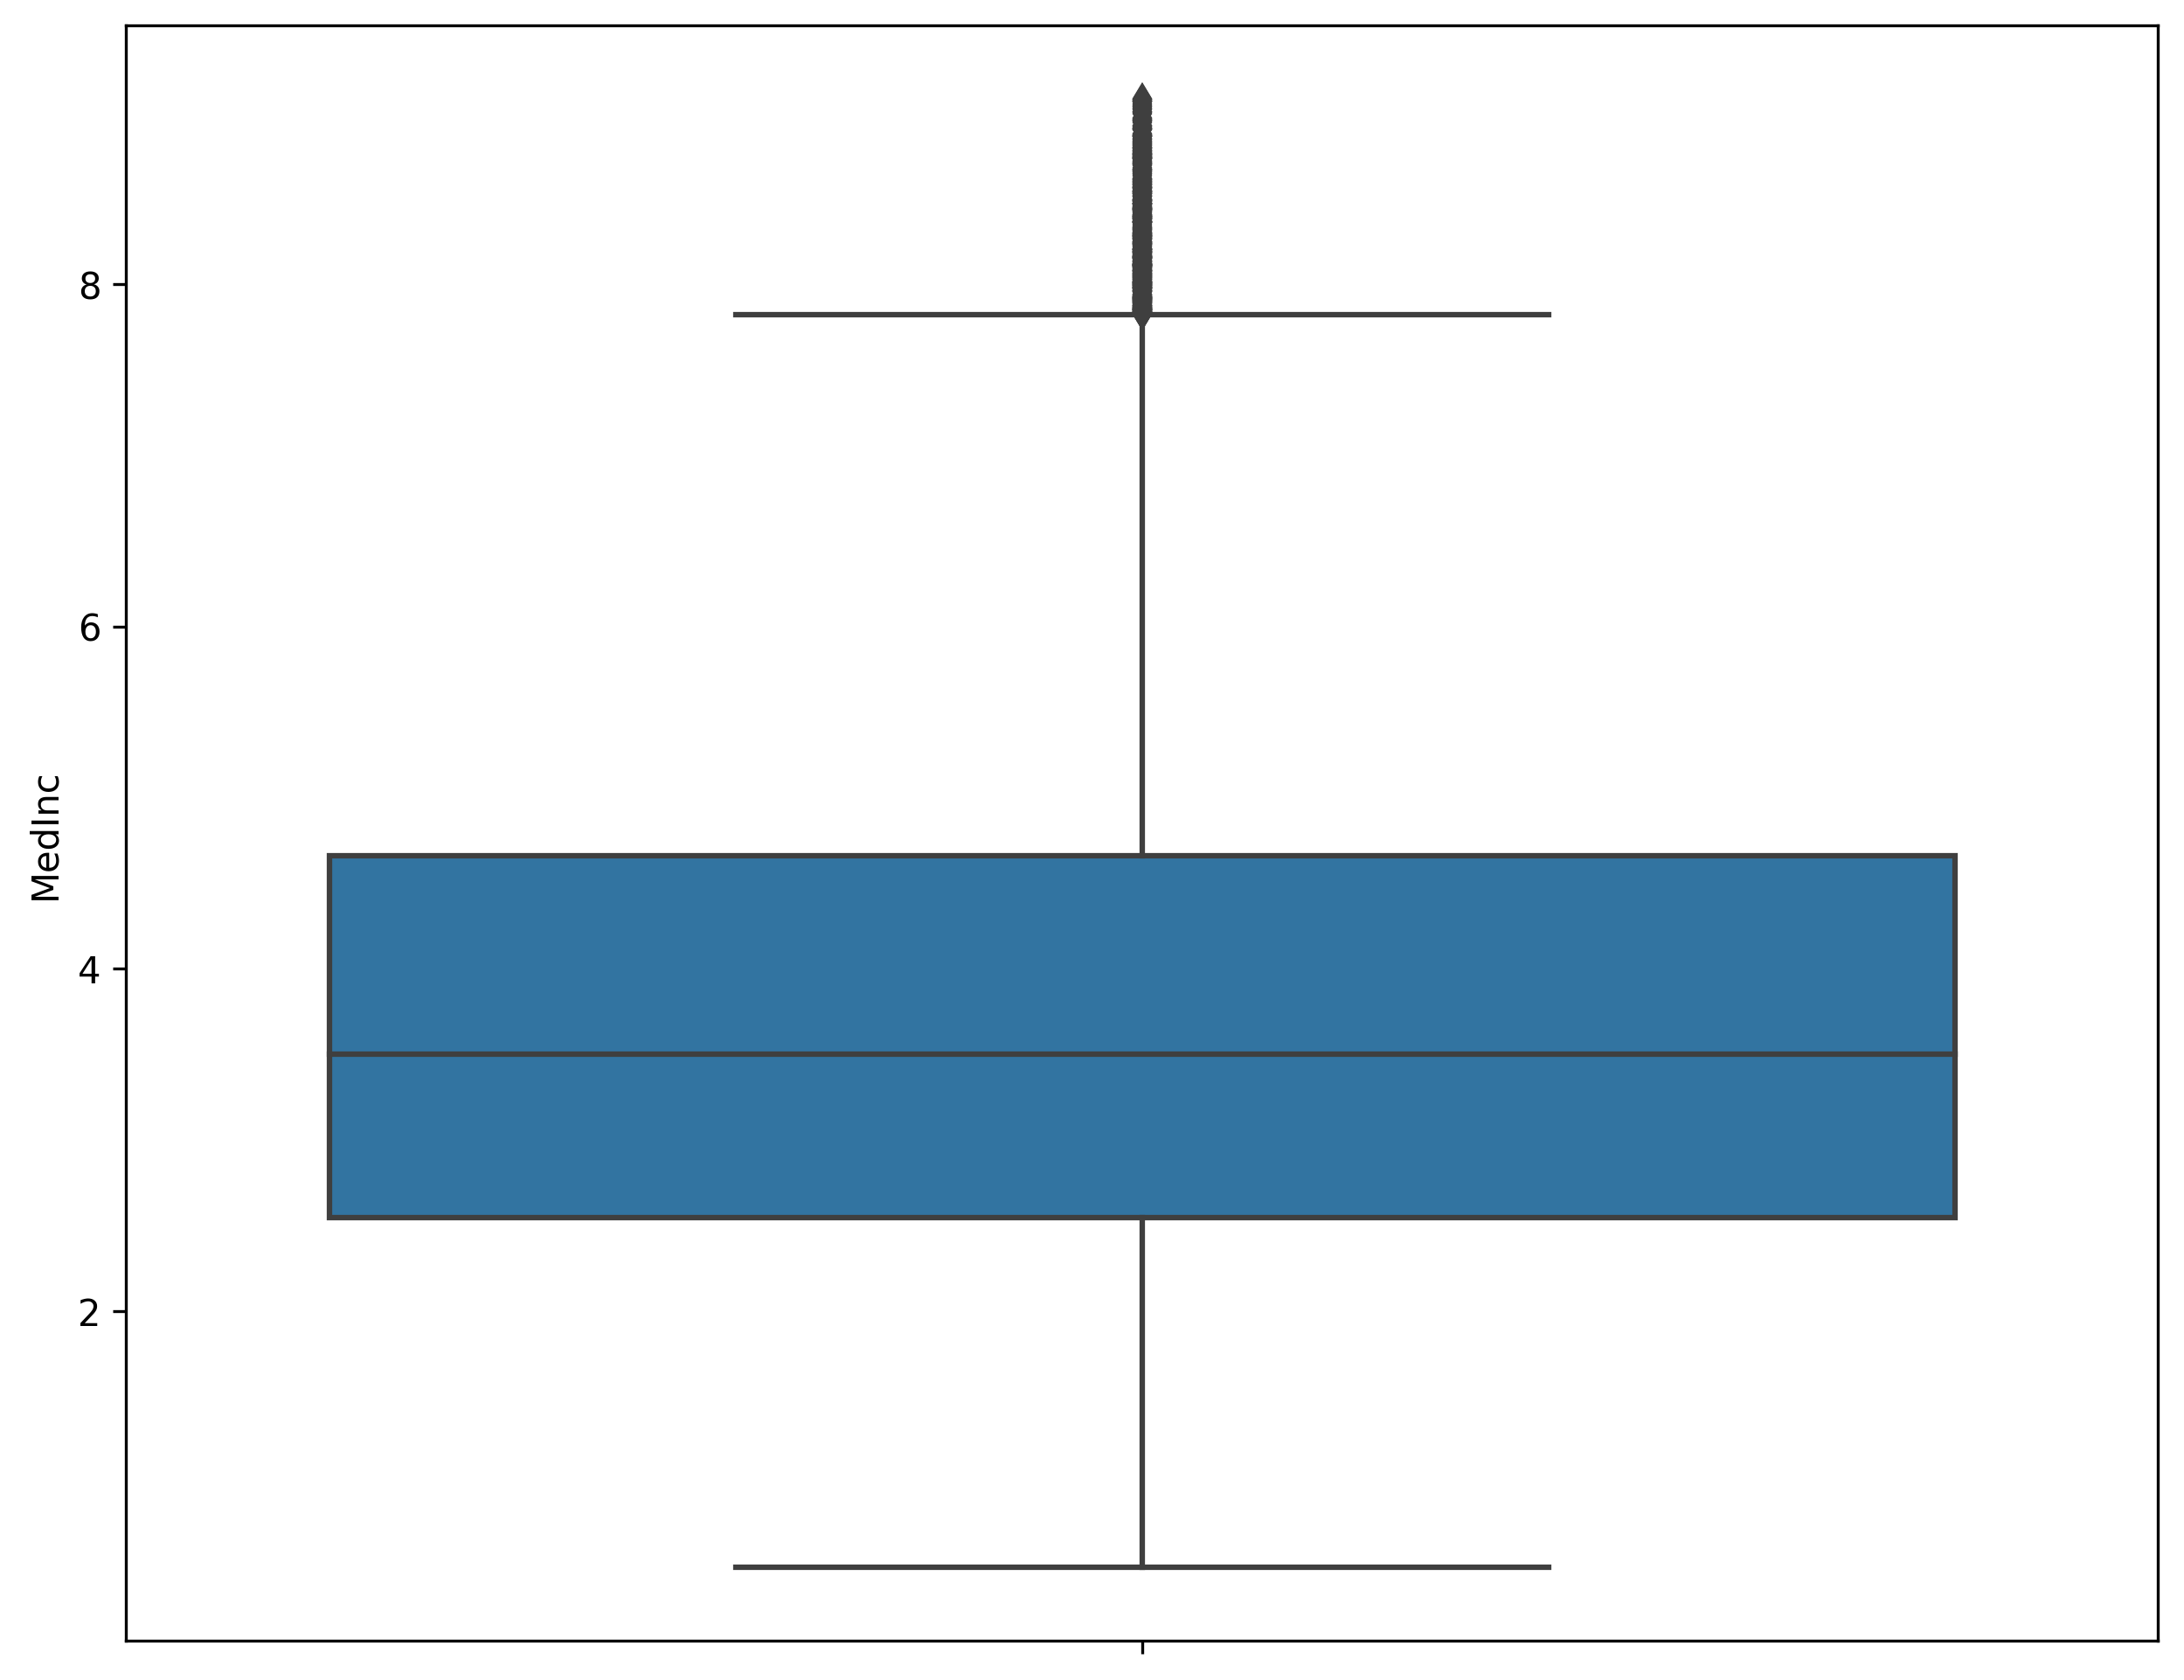

In [19]:
# 이상치 1차 제거 후 시각화
plt.figure(figsize = (10, 8))
sns.boxplot(y='MedInc', data = df_1)
plt.show()

### 이상치 1차 제거 후, 회귀분석

In [20]:
linear_regression(df_1, 'MedInc', 'Target')

train cnt: 14172
test cnt: 6074
train R2:0.42156
test R2:0.42735
rmse: 0.828


(LinearRegression(),
 0.42156115799252825,
 0.42735362780415254,
 0.8282927420599928)

### 이상치 2차 제거 및 시각화
- rev_range = 1.5

In [21]:
# 2차 제거
Q1 = df_1['MedInc'].quantile(0.25)
Q3 = df_1['MedInc'].quantile(0.75)
IQR = Q3 - Q1
rev_range = 1.5

filter = (df_1['MedInc'] >= Q1 - IQR*rev_range) & (df_1['MedInc'] <= Q3 + IQR*rev_range)

In [22]:
df_2 = df_1.loc[filter]

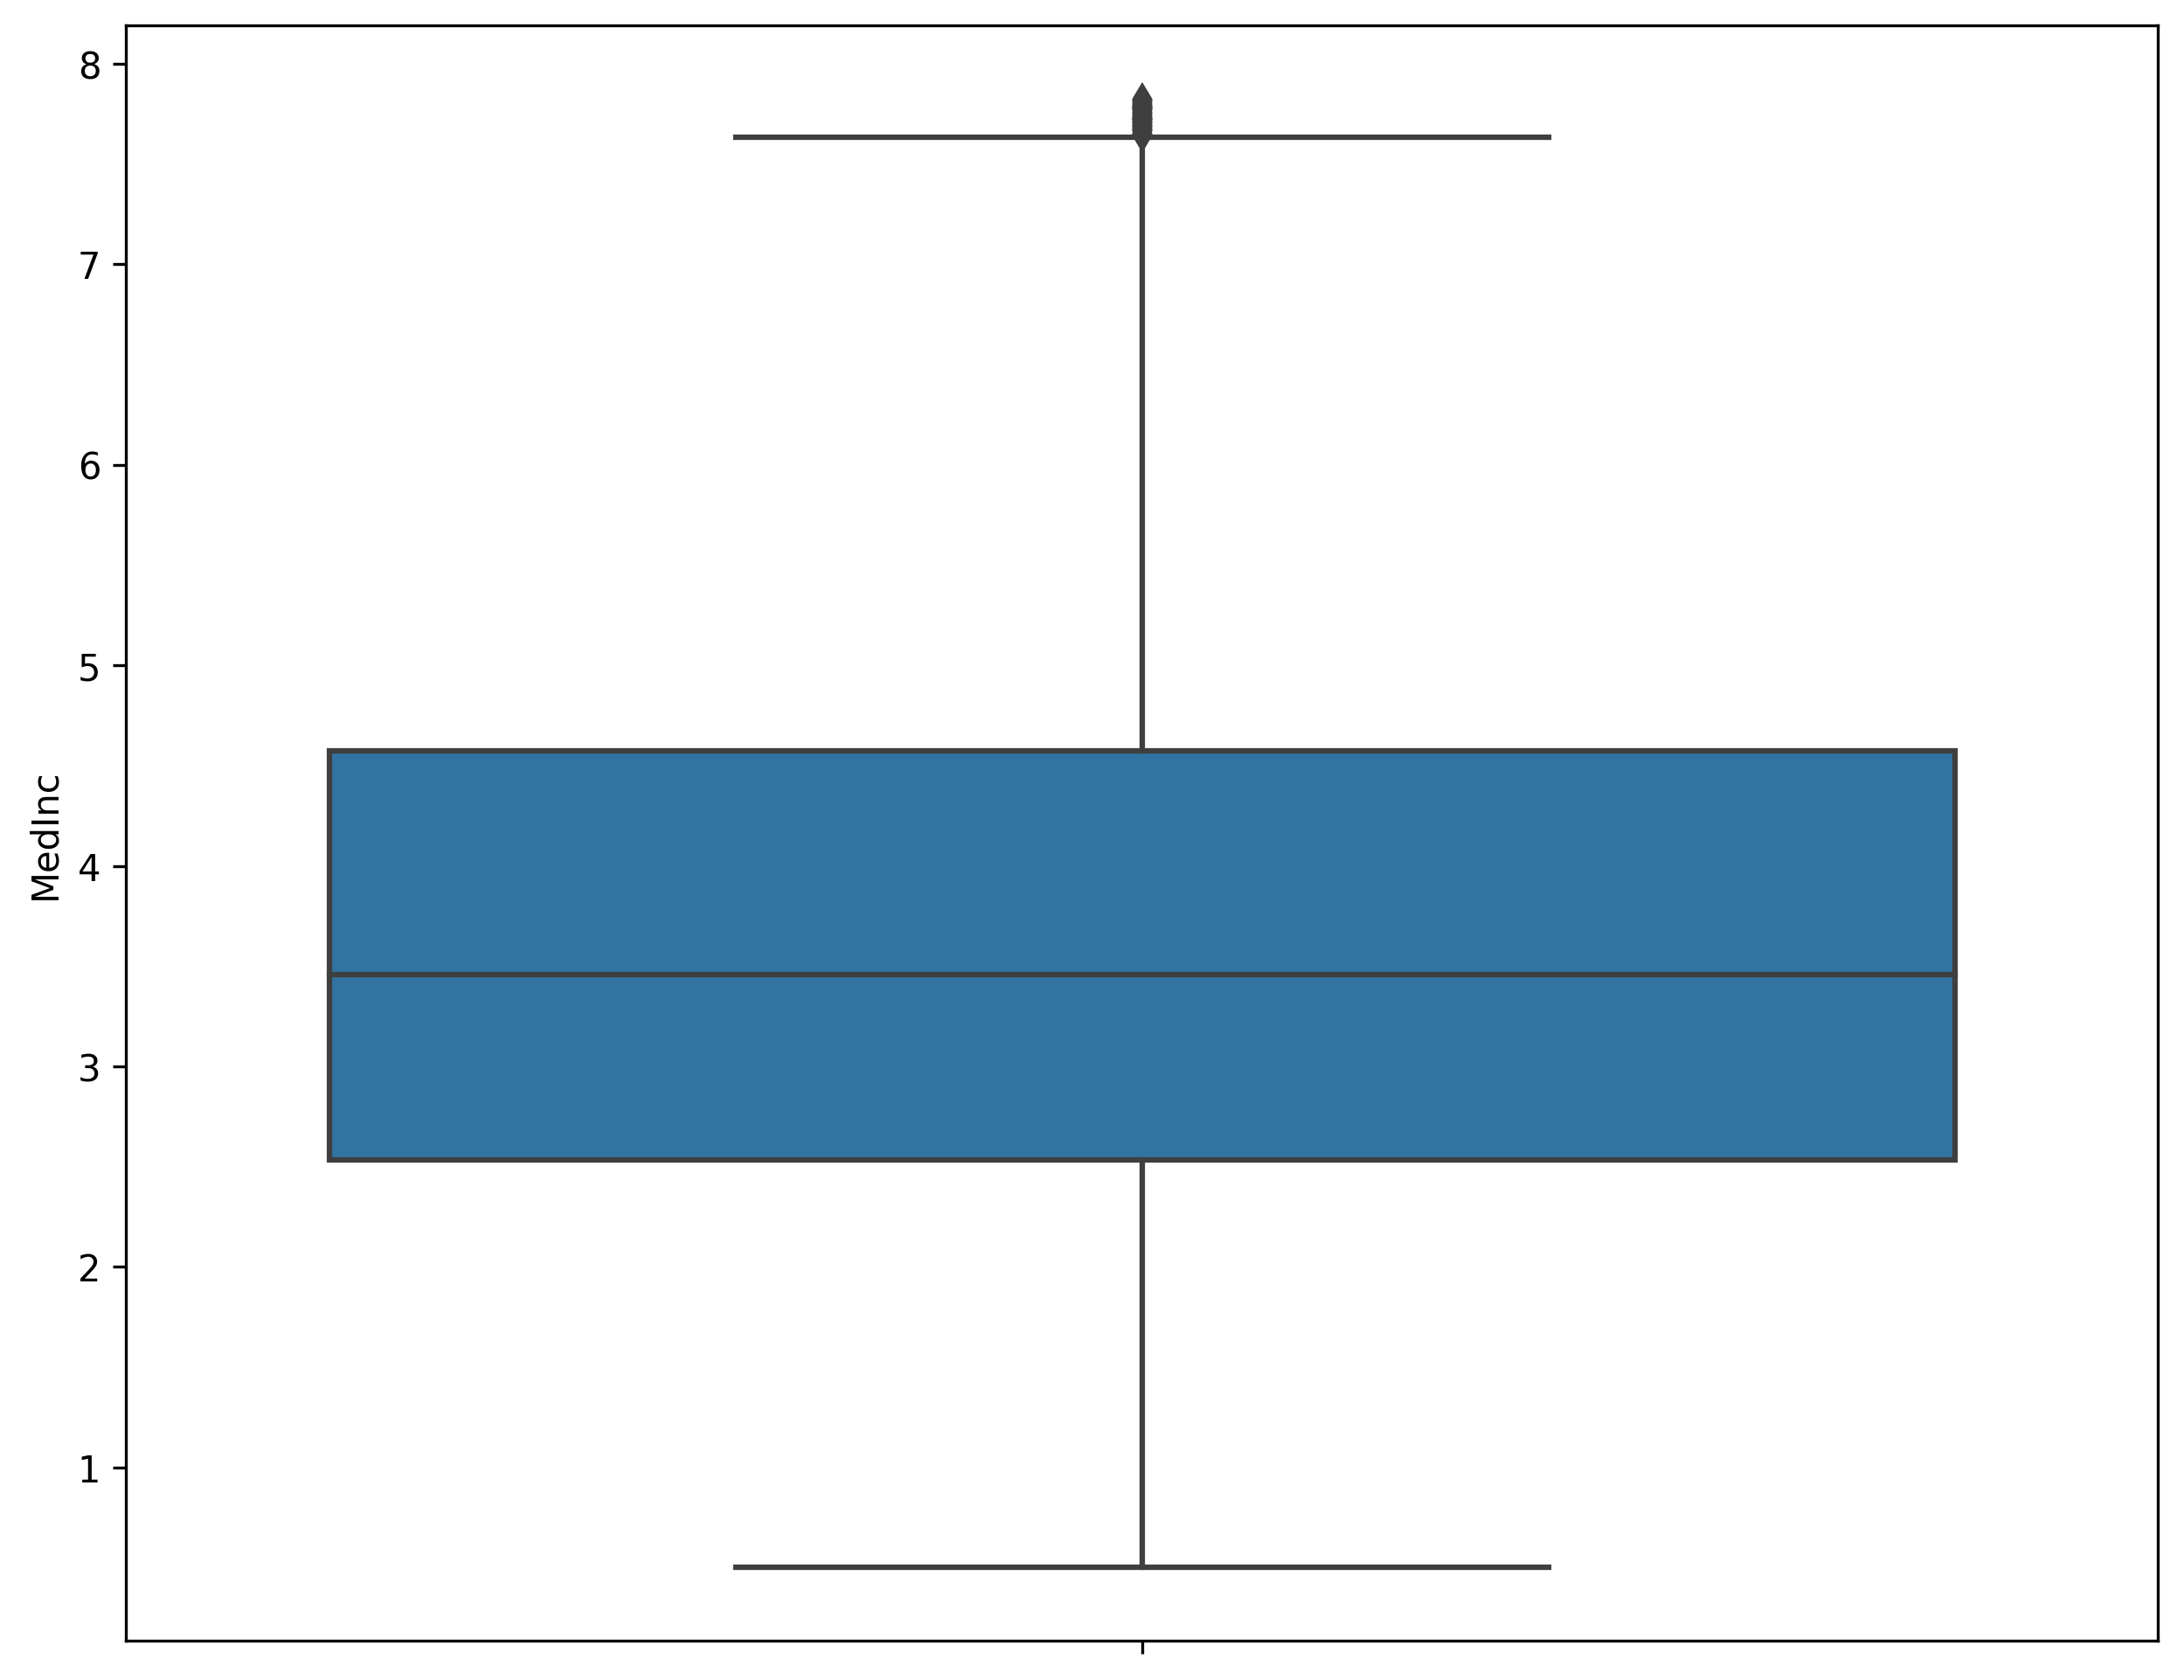

In [23]:
plt.figure(figsize = (10, 8))
sns.boxplot(y='MedInc', data = df_2)
plt.show()

### 이상치 2차 제거 후, 회귀 분석

In [24]:
linear_regression(df_2, 'MedInc', 'Target')

train cnt: 13907
test cnt: 5961
train R2:0.36776
test R2:0.39180
rmse: 0.811


(LinearRegression(),
 0.36775923825981227,
 0.3918000836591937,
 0.8107746772406488)

### Base, 1차, 2차 비교

In [29]:
result_df = pd.DataFrame({'시도':['base', '1차', '2차'],
                         'test R2':[0.46021, 0.42735 , 0.39180],
                         'RMSE':[0.848, 0.828 , 0.811]})

result_df

시도  test R2   RMSE
0  base  0.46021  0.848
1    1차  0.42735  0.828
2    2차  0.39180  0.811

### 추가 비교, 1차 이상치 제거후 Rev_range를 1.5가 아닌 2.0으로

In [30]:
Q1 = df_1['MedInc'].quantile(0.25)
Q3 = df_1['MedInc'].quantile(0.75)
IQR = Q3 - Q1
rev_range = 2.0

filter = (df_1['MedInc'] >= Q1 - IQR*rev_range) & (df_1['MedInc'] <= Q3 + IQR*rev_range)
df_3 = df_1.loc[filter]

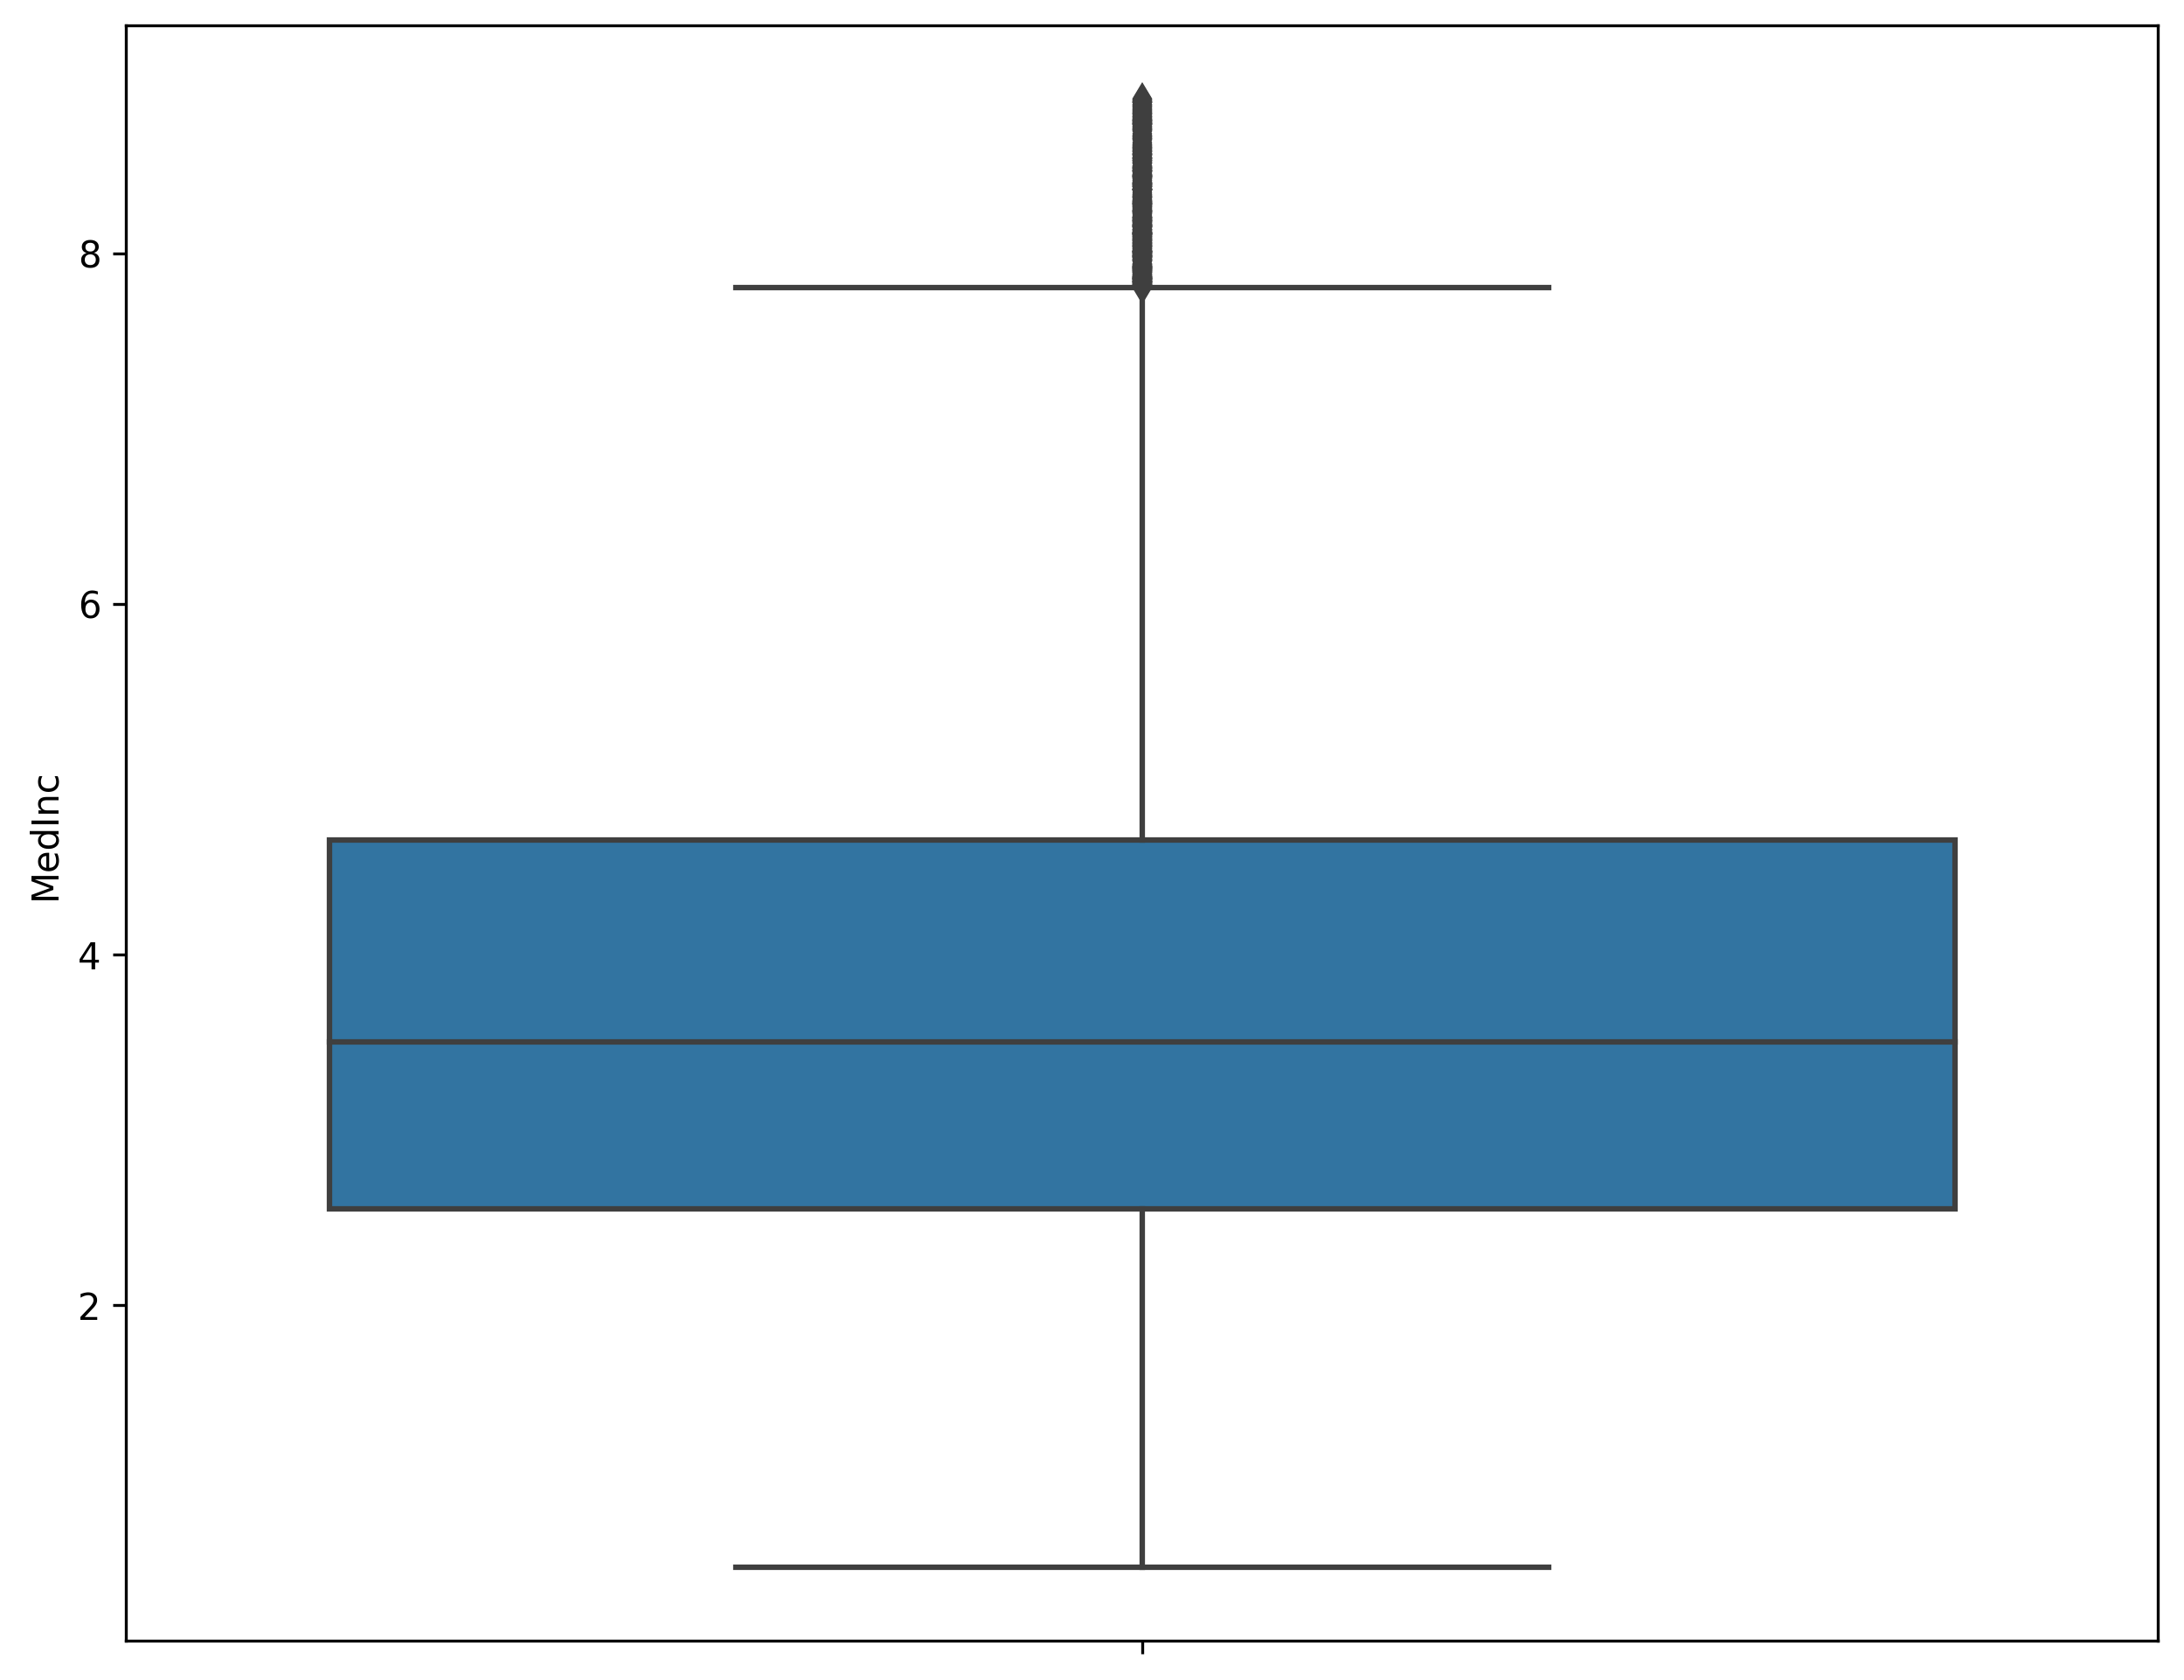

In [31]:
plt.figure(figsize = (10, 8))
sns.boxplot(y='MedInc', data = df_3)
plt.show()

In [32]:
linear_regression(df_3, 'MedInc', 'Target')

train cnt: 14153
test cnt: 6066
train R2:0.42046
test R2:0.41690
rmse: 0.836


(LinearRegression(),
 0.4204572997646123,
 0.4168991488906957,
 0.8355902138370968)

- 이상치를 계속 제거한다고 반드시 R2가 높아지지는 않는 것으로 보임
- RMSE는 낮아지는 경향이 있음